In [5]:
import os
import base64
from typing import List, Tuple
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from audio2vector import audio2vector
from dotenv import load_dotenv

load_dotenv()


# Function to collect all audio file paths and their labels
def collect_audio_files_and_labels(root_dir: str) -> List[Tuple[str, str]]:
    audio_files_and_labels = []
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.wav'):
                    audio_files_and_labels.append((os.path.join(folder_path, file_name), folder_name))
    return audio_files_and_labels

# Main function to process audio files, apply PCA, and plot the results
def process_and_plot(root_dir: str):
    audio_files_and_labels = collect_audio_files_and_labels(root_dir)
    vectors = []
    labels = []

    for file_path, label in audio_files_and_labels:
        vector = audio2vector(file_path)
        vectors.append(vector)
        labels.append(label)

    # Convert list of vectors to a 2D numpy array
    vectors = np.array(vectors)

    # Apply PCA to reduce dimensions to 2
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Plotting
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    for label in unique_labels:
        indices = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(reduced_vectors[indices, 0], reduced_vectors[indices, 1], label=label)
    
    plt.title('PCA of Audio Samples')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid()
    plt.show()


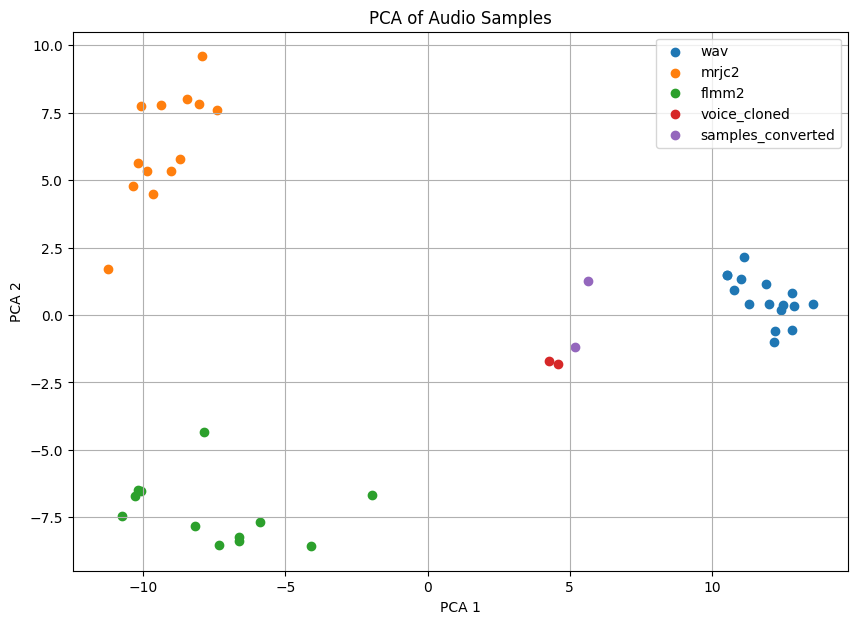

In [6]:
root_dir = "audio_samples"
process_and_plot(root_dir)
